<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/cwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import sys
import h5py #librerua para crear archivos , h5py
import pandas as pd
import math
from scipy.fft import fft, fftfreq

In [2]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [23]:
def calculate_signal_sum(signal):
    signal_squared = np.square(signal)
    signal_sum = np.sum(signal_squared)
    return signal_sum


In [5]:

def get_selected_key_and_data(h5py_file_path, index=0):
    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        selected_key = keys[index]
        selected_data = h5_file[selected_key][:]
        print("Selected Key:", selected_key)
    return selected_key, selected_data

In [6]:
def get_lengths_array(coeffs):
    sample_counts= [len(arr) for arr in coeffs]
    time_arrays = [np.linspace(0, 300, num=samples, endpoint=False) for samples in sample_counts]
    return time_arrays

In [7]:
def plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2):
    num_graphs = len(time_arrays_1)  # Assuming both sets have the same length

    title = [None] * num_graphs
    title[0] = "A" + str(num_graphs - 1)
    title[1] = "D" + str(num_graphs - 1)

    for i in range(2, num_graphs):
        title[i] = "D" + str(num_graphs - i)

    for i in range(num_graphs):
        plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
        # Create titles based on coefficient array lengths
        title_set_1 = title[i]
        title_set_2 = title[i]

        # Check if index is within the range of arrays
        if i < len(time_arrays_1) and i < len(coeffs_1):
            # Plot the first set (time_arrays_1 vs coeffs_1)
            plt.subplot(1, 2, 1)
            plt.plot(time_arrays_1[i], coeffs_1[i], label=title_set_1, color='red')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 1: {title_set_1}')

            # Plot the second set (time_arrays_2 vs coeffs_2)
            plt.subplot(1, 2, 2)
            plt.plot(time_arrays_2[i], coeffs_2[i], label=title_set_2, color='blue')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 2: {title_set_2}')

            plt.tight_layout()  # Adjust the layout for better visualization
            plt.show()  # Display the current plot window

    return title

In [9]:

def band_maker(coeffs, fs, title):
    p = len(coeffs)- 1
    low_frequencies = [None] * len(coeffs)
    high_frequencies = [None] * len(coeffs)

    # low_frequencies[0] = 0
    # high_frequencies[0] = fs / (2 ** (p) * 2)
    for i in range(0, len(coeffs)):
         high_frequencies[i] = fs / (2 ** (p+-i + 1))
    low_frequencies[0]=0
    low_frequencies[1:len(low_frequencies)]= high_frequencies[:len(low_frequencies) - 1]



    return  high_frequencies,low_frequencies


In [8]:
def frequencies_maker(N,fs,d,D,theta):
  theta=(theta/180)*np.pi
  FTF=(fs/2)*(1-d/D*np.cos(theta))
  BPFI=(N*fs/2)*(1+d/D*np.cos(theta))
  BPFO=(N*fs/2)*(1-d/D*np.cos(theta))
  BSF=(D*fs/d)*(1-(d/D)**2*np.cos(theta))
  return(FTF,BPFI,BPFO,BSF)


In [10]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [ ]:
 print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [ ]:
print(pywt.wavelist('db'))

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


In [11]:
FTF,BPFI,BPFO,BSF=frequencies_maker(9,50.17,7.90,38.5,0)
data = {
    'Name': ['Fundamental train frequency (FTF)', 'Ball pass frequency inner (BPFI)', 'Ball pass frequency outer (BPFO)','Ball spin frequency (BSF)'],
    'Values (HZ)': [FTF, BPFI, BPFO,BSF]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                                Name  Values (HZ)
0  Fundamental train frequency (FTF)    19.937688
1   Ball pass frequency inner (BPFI)   272.090805
2   Ball pass frequency outer (BPFO)   179.439195
3          Ball spin frequency (BSF)   234.204744


In [65]:
## calculo el nivel del banco de filtro:
fs=math.ceil(FTF) #frecuencia natural , se usa la del train frequencie
fe=25.6e3 # frecuencia de sampleo
n = math.ceil(math.log(fe / fs) / math.log(2)) +2
level = n

Available files:
1. 0Nm_BPFI_03
2. 0Nm_BPFI_10
3. 0Nm_BPFI_30
4. 0Nm_BPFO_03
5. 0Nm_BPFO_10
6. 0Nm_BPFO_30
7. 0Nm_Misalign_01
8. 0Nm_Misalign_03
9. 0Nm_Misalign_05
10. 0Nm_Normal
11. 0Nm_Unbalance_0583mg
12. 0Nm_Unbalance_1169mg
13. 0Nm_Unbalance_1751mg
14. 0Nm_Unbalance_2239mg
15. 0Nm_Unbalance_3318mg
16. 2Nm_BPFI_03
17. 2Nm_BPFI_10
18. 2Nm_BPFI_30
19. 2Nm_BPFO_03
20. 2Nm_BPFO_10
21. 2Nm_BPFO_30
22. 2Nm_Misalign_01
23. 2Nm_Misalign_03
24. 2Nm_Misalign_05
25. 2Nm_Normal
26. 2Nm_Unbalalnce_0583mg
27. 2Nm_Unbalalnce_1169mg
28. 2Nm_Unbalalnce_1751mg
29. 2Nm_Unbalalnce_2239mg
30. 2Nm_Unbalalnce_3318mg
31. 4Nm_BPFI_03
32. 4Nm_BPFI_10
33. 4Nm_BPFI_30
34. 4Nm_BPFO_03
35. 4Nm_BPFO_10
36. 4Nm_BPFO_30
37. 4Nm_Misalign_01
38. 4Nm_Misalign_03
39. 4Nm_Misalign_05
40. 4Nm_Normal
41. 4Nm_Unbalance_0583mg
42. 4Nm_Unbalance_1169mg
43. 4Nm_Unbalance_1751mg
44. 4Nm_Unbalance_2239mg
45. 4Nm_Unbalance_3318mg
Enter the index of the file you want to plot: 1
Do you want an interactive graph? (yes/no): no


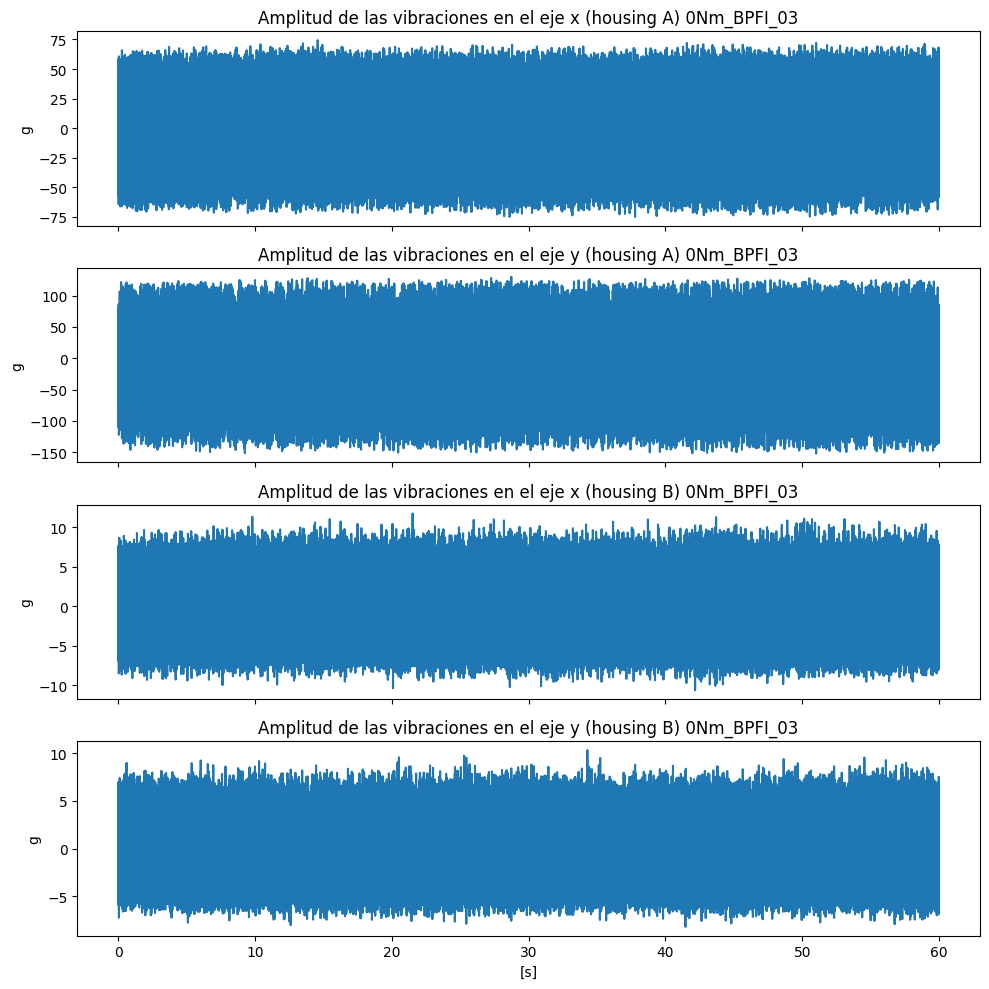

In [38]:
time_array=graficador.plot_data_from_h5py(output_file[0])

In [39]:
h5py_file_path=output_file[0]
selected_key_fault,selected_data_fault=get_selected_key_and_data(h5py_file_path, index=0)

Selected Key: 0Nm_BPFI_03


In [74]:

w = pywt.Wavelet('db32')
signal_faulty= selected_data_fault[:,1] ##rodamiento B bajo falla (eje x)
# # Perform DWT
coeffs_2 = pywt.wavedec(signal_faulty, w, level=level)
time_arrays_2=get_lengths_array(coeffs_2)

Available files:
1. 0Nm_BPFI_03
2. 0Nm_BPFI_10
3. 0Nm_BPFI_30
4. 0Nm_BPFO_03
5. 0Nm_BPFO_10
6. 0Nm_BPFO_30
7. 0Nm_Misalign_01
8. 0Nm_Misalign_03
9. 0Nm_Misalign_05
10. 0Nm_Normal
11. 0Nm_Unbalance_0583mg
12. 0Nm_Unbalance_1169mg
13. 0Nm_Unbalance_1751mg
14. 0Nm_Unbalance_2239mg
15. 0Nm_Unbalance_3318mg
16. 2Nm_BPFI_03
17. 2Nm_BPFI_10
18. 2Nm_BPFI_30
19. 2Nm_BPFO_03
20. 2Nm_BPFO_10
21. 2Nm_BPFO_30
22. 2Nm_Misalign_01
23. 2Nm_Misalign_03
24. 2Nm_Misalign_05
25. 2Nm_Normal
26. 2Nm_Unbalalnce_0583mg
27. 2Nm_Unbalalnce_1169mg
28. 2Nm_Unbalalnce_1751mg
29. 2Nm_Unbalalnce_2239mg
30. 2Nm_Unbalalnce_3318mg
31. 4Nm_BPFI_03
32. 4Nm_BPFI_10
33. 4Nm_BPFI_30
34. 4Nm_BPFO_03
35. 4Nm_BPFO_10
36. 4Nm_BPFO_30
37. 4Nm_Misalign_01
38. 4Nm_Misalign_03
39. 4Nm_Misalign_05
40. 4Nm_Normal
41. 4Nm_Unbalance_0583mg
42. 4Nm_Unbalance_1169mg
43. 4Nm_Unbalance_1751mg
44. 4Nm_Unbalance_2239mg
45. 4Nm_Unbalance_3318mg
Enter the index of the file you want to plot: 10
Do you want an interactive graph? (yes/no): no


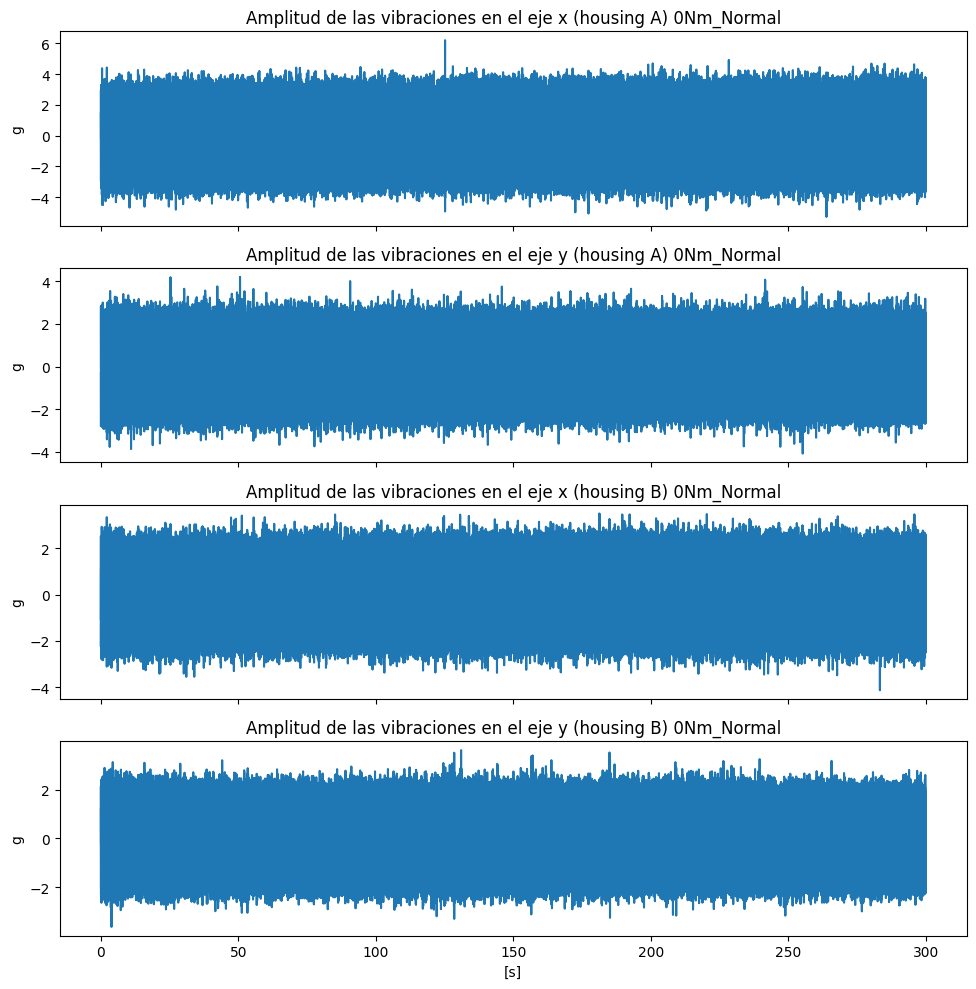

In [41]:
time_array=graficador.plot_data_from_h5py(output_file[0])

In [42]:
h5py_file_path=output_file[0]
selected_key_healty,selected_data_healty=get_selected_key_and_data(h5py_file_path, index=9)

Selected Key: 0Nm_Normal


In [73]:
##3calculo  B en el eje x  sano
w = pywt.Wavelet('db32')
signal_healty= selected_data_healty [:,1]
# # Perform DWT
coeffs_1 = pywt.wavedec(signal_healty, w, level=level)
time_arrays_1=get_lengths_array(coeffs_1)

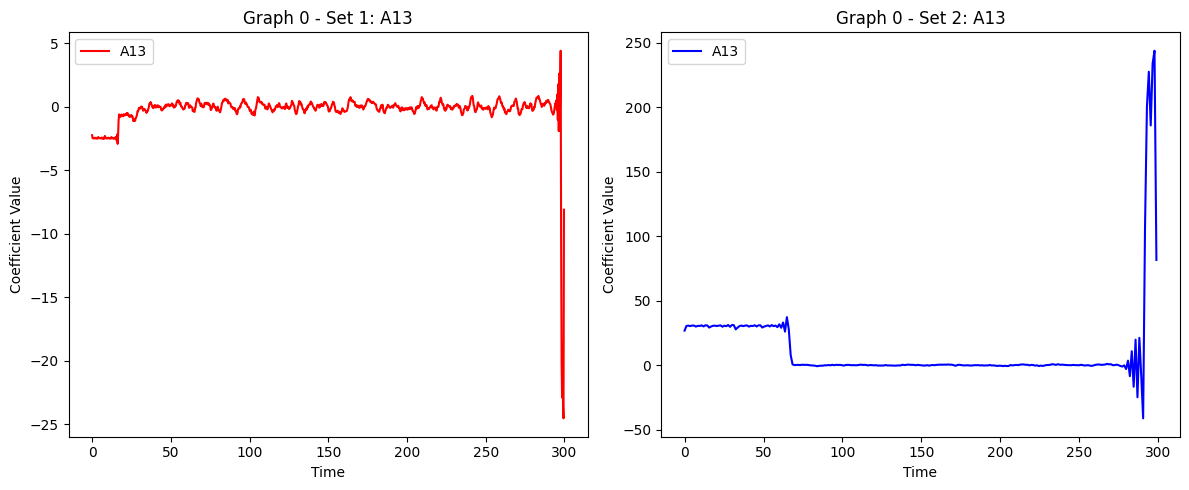

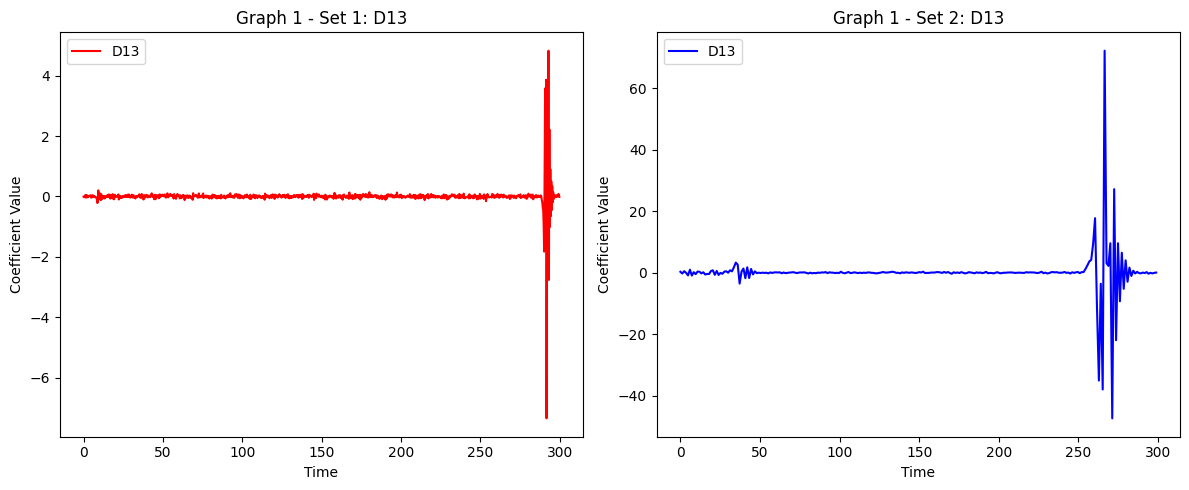

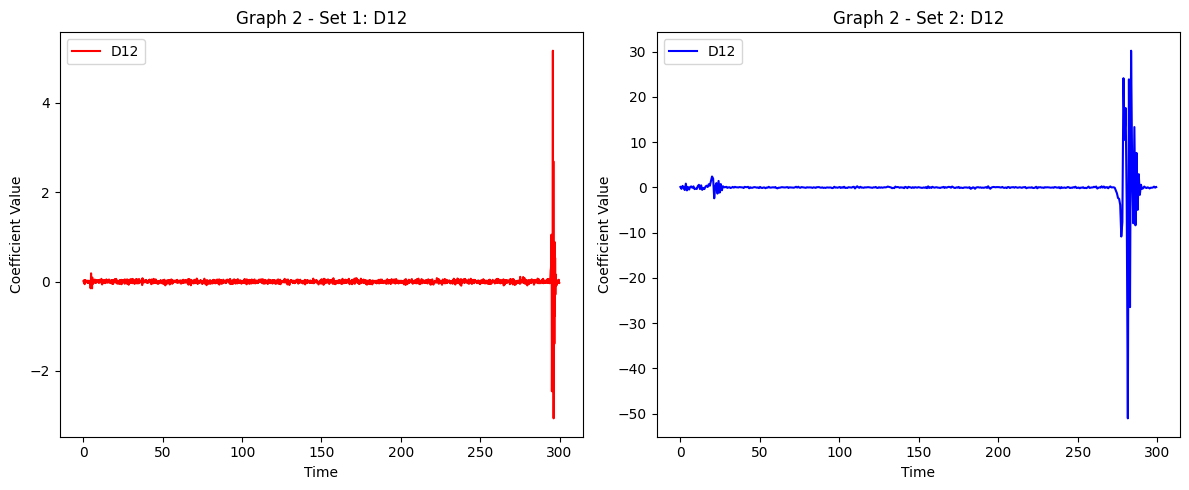

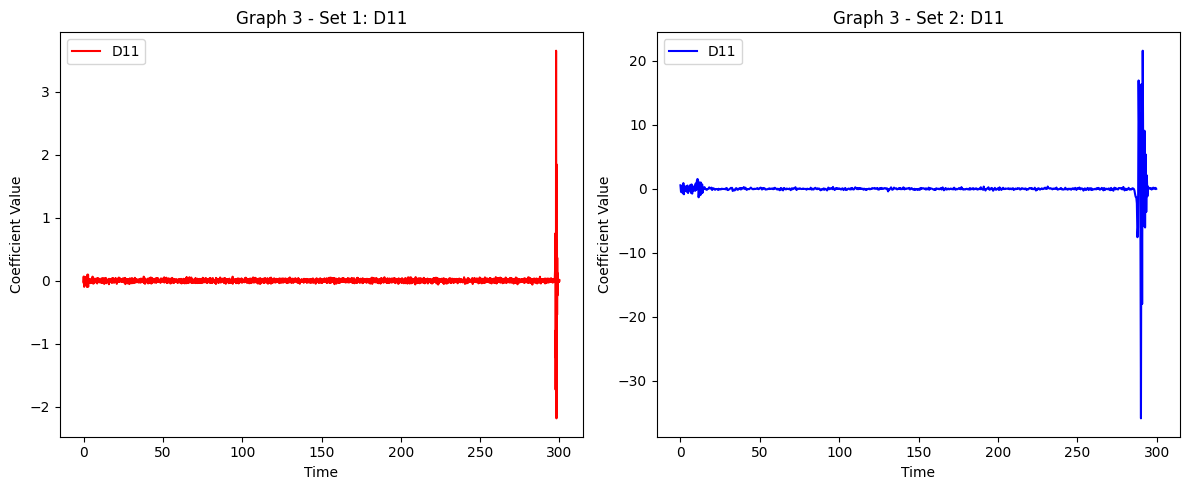

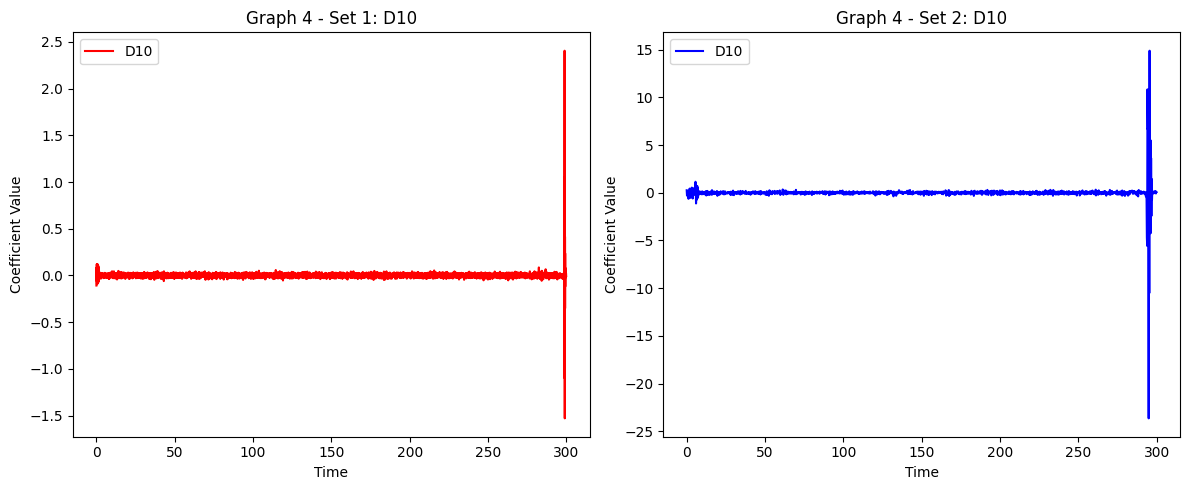

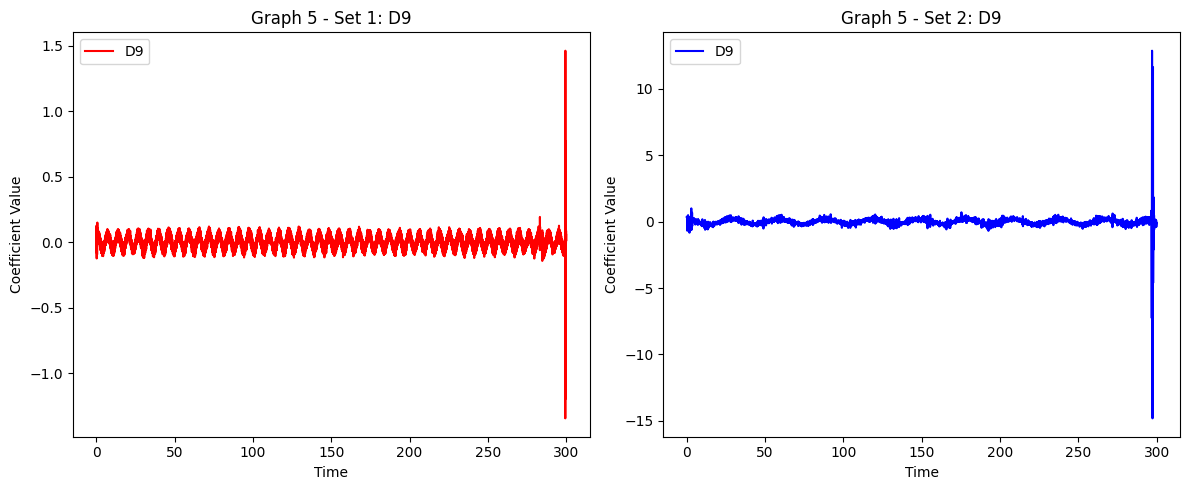

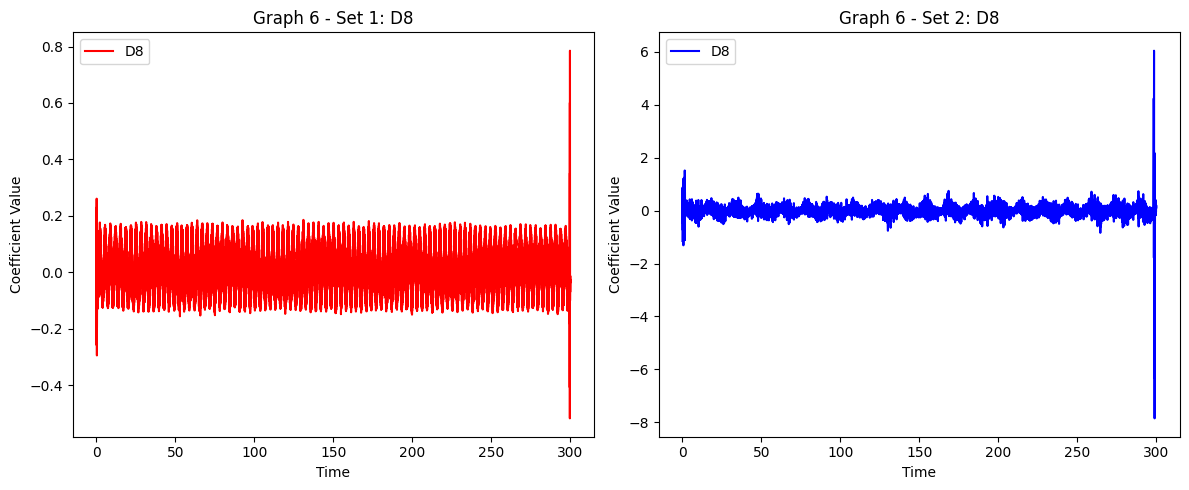

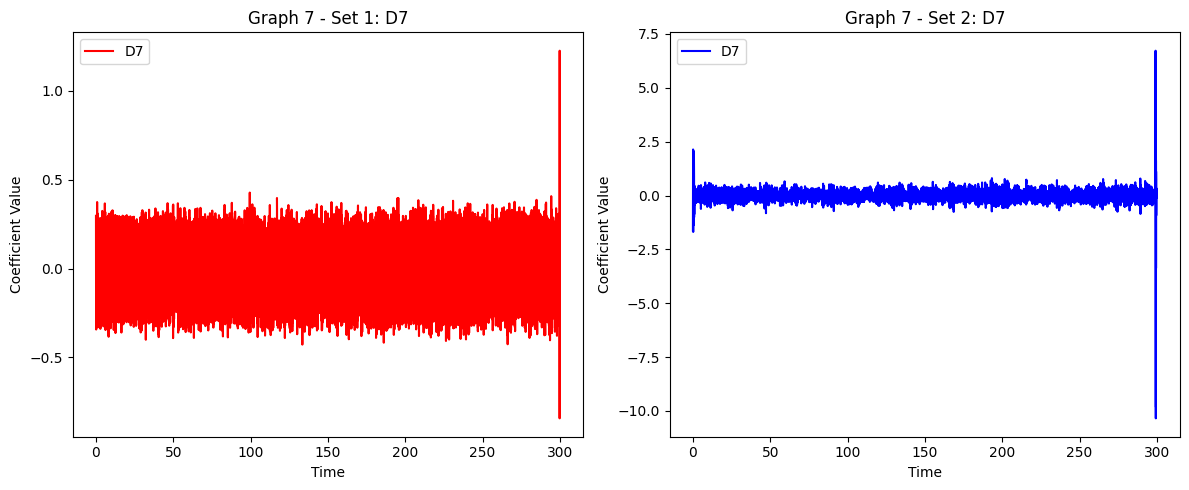

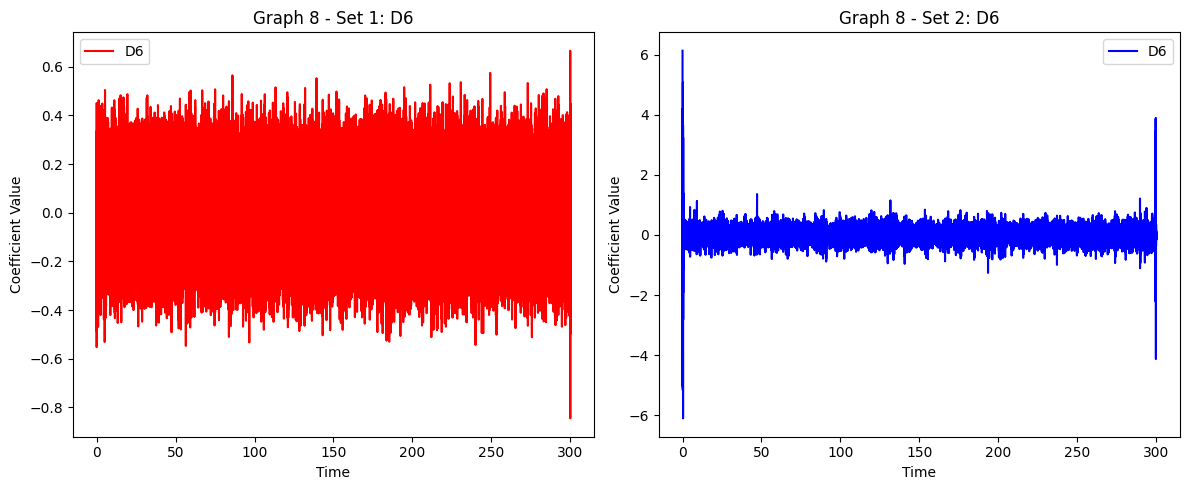

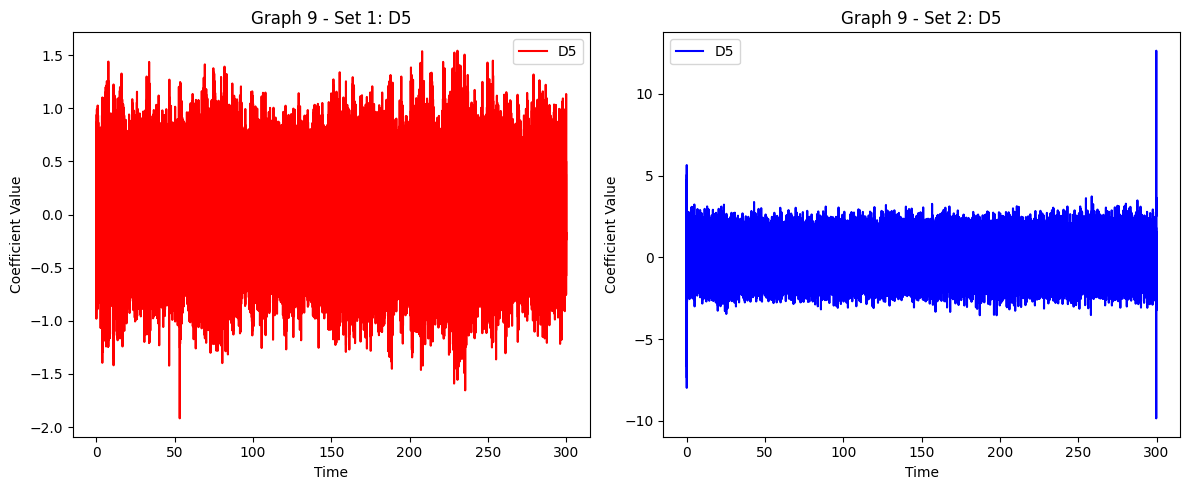

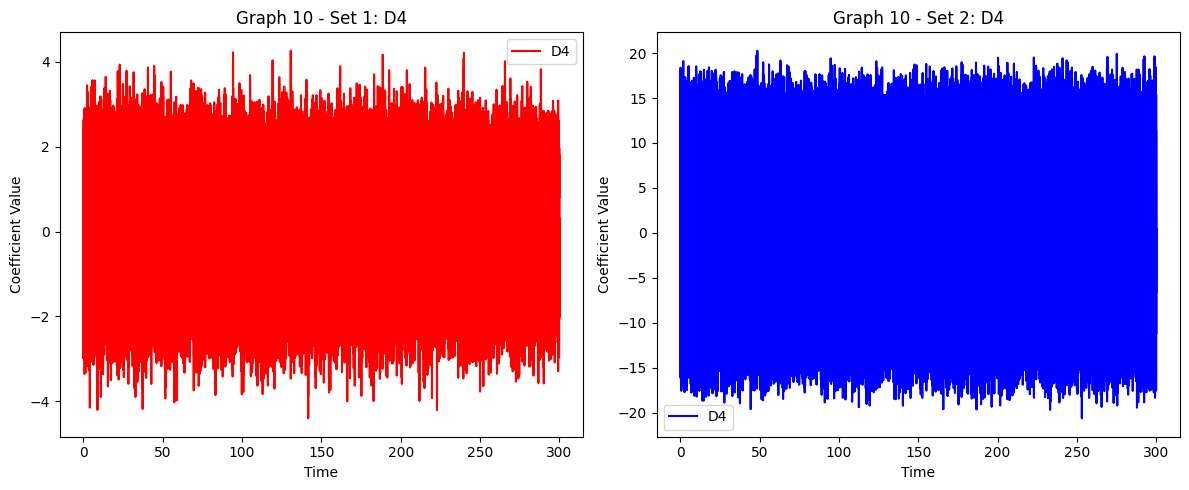

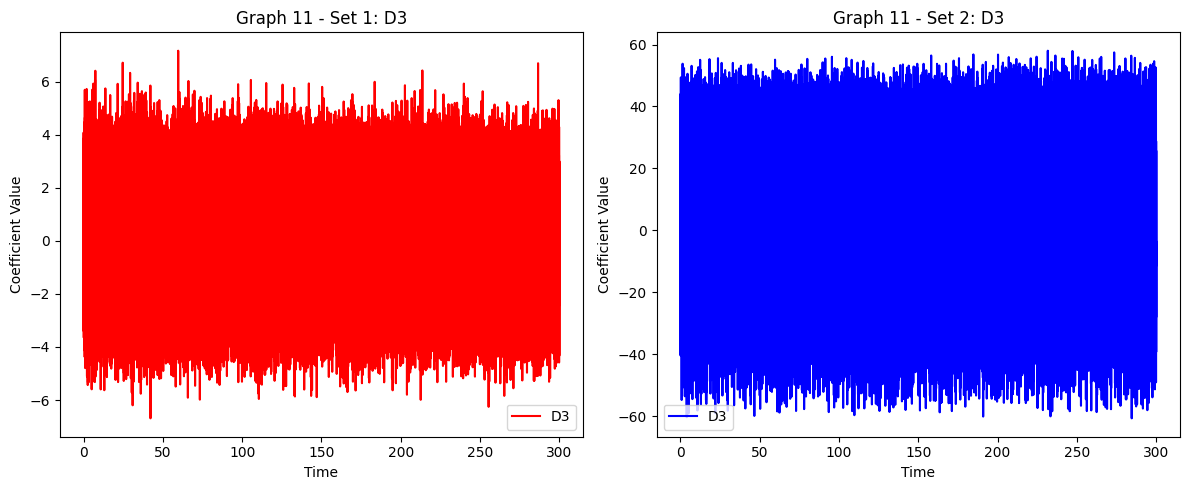

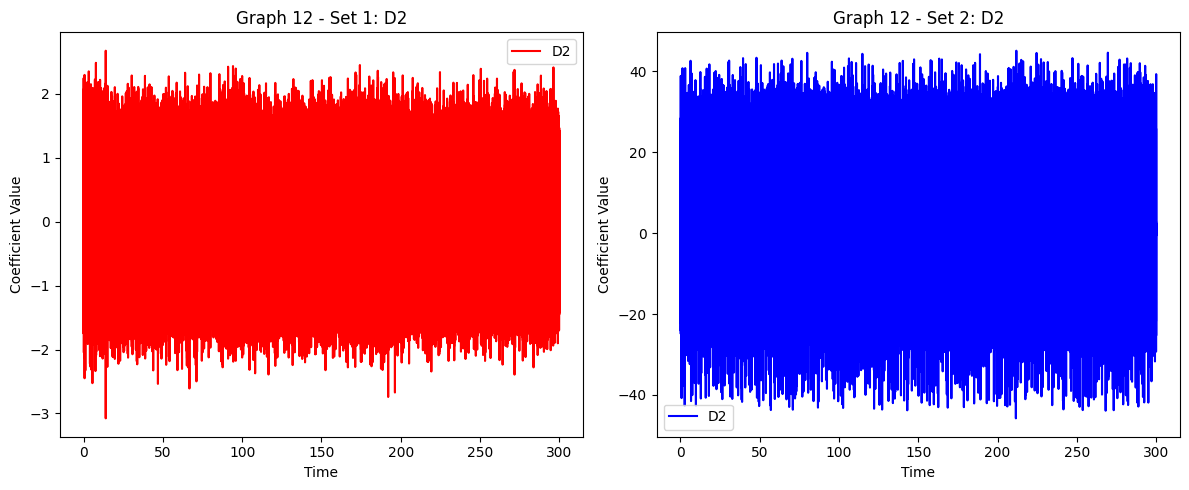

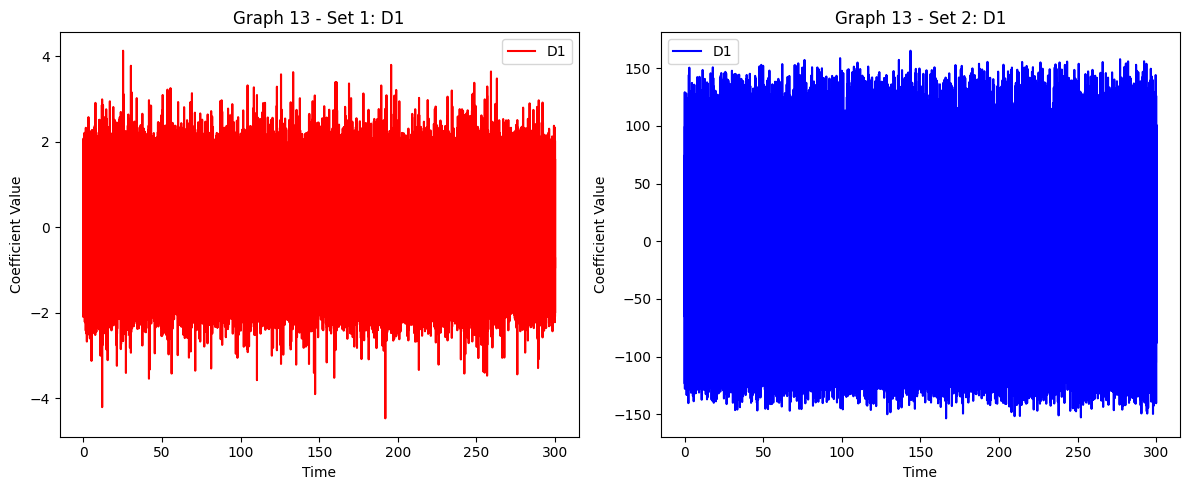

In [75]:
title=plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2)

In [69]:

fs = 25.6e3
high_frequencies,  low_frequencies = band_maker(coeffs_2, fs, title)
df = pd.DataFrame({'Coefficient': title, 'Low Frequency': low_frequencies, 'High Frequency': high_frequencies})
df


,Coefficient,Low Frequency,High Frequency
0,A13,0.0000,1.5625
1,D13,1.5625,3.1250
2,D12,3.1250,6.2500
3,D11,6.2500,12.5000
4,D10,12.5000,25.0000
5,D9,25.0000,50.0000
6,D8,50.0000,100.0000
7,D7,100.0000,200.0000
8,D6,200.0000,400.0000
9,D5,400.0000,800.0000


In [76]:
energies_healty = []
x=coeffs_1
for sub_array in x:
    energy = np.sum(np.abs(sub_array)**2)
    energies_healty.append(energy)

In [77]:
energies_faulty = []
x_1=coeffs_2
for sub_array in x_1:
    energy = np.sum(np.abs(sub_array)**2)
    energies_faulty .append(energy)

In [78]:
df = pd.DataFrame({'Coefficient': title, 'Nivel de energia rodamiento sano ':  energies_healty, 'Nivel de energia rodamiento bajo falla ': energies_faulty})
df

,Coefficient,Nivel de energia rodamiento sano,Nivel de energia rodamiento bajo falla
0,A13,3.104991e+03,3.142422e+05
1,D13,1.295791e+02,1.237334e+04
2,D12,6.782727e+01,6.463449e+03
3,D11,3.449311e+01,3.179257e+03
4,D10,1.586762e+01,1.376041e+03
5,D9,4.277310e+01,8.117526e+02
6,D8,2.007535e+02,4.500316e+02
7,D7,1.021342e+03,8.642993e+02
8,D6,2.406783e+03,1.657538e+03
9,D5,3.043641e+04,5.922600e+04


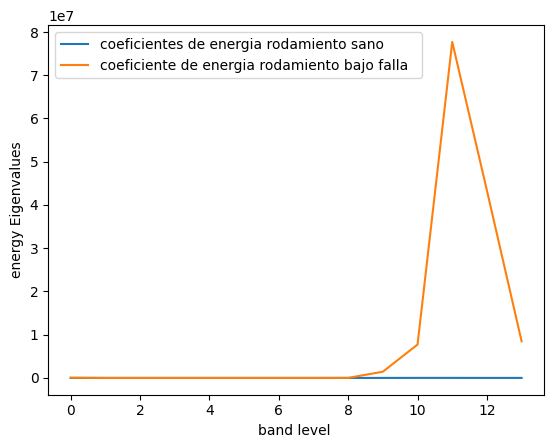

In [35]:
num_data_points = len(energies_faulty)  # or len(e_values_healty) or len(energy_faulty) or len(e_values_faulty)

plt.plot(range(num_data_points),  energies_healty, label='coeficientes de energia rodamiento sano')
plt.plot(range(num_data_points),energies_faulty, label='coeficiente de energia rodamiento bajo falla  ')
plt.xlabel('band level ')
plt.ylabel('energy Eigenvalues')
plt.legend()
plt.show()